# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [3]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

In [4]:
from PIL import Image

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

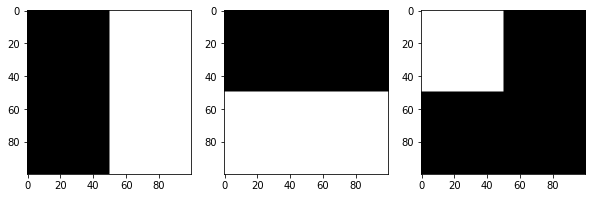

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


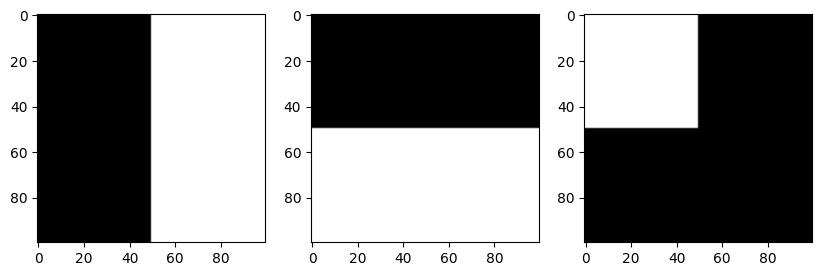

In [18]:
# solution
img_array1 = np.zeros((100, 100, 3), dtype = np.uint8)
img_array1[:, 50:] = [255, 255, 255]
img1 = Image.fromarray(img_array1)

img_array2 = np.zeros((100, 100, 3), dtype = np.uint8)
img_array2[50:, :] = [255, 255, 255]
img2 = Image.fromarray(img_array2)

img_array3 = np.zeros((100, 100, 3), dtype = np.uint8)
img_array3[:50, :] = [255, 255, 255]
img_array3[:50, 50:] = [0, 0, 0]
img3 = Image.fromarray(img_array3)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

*   Use the above three images to create the following image

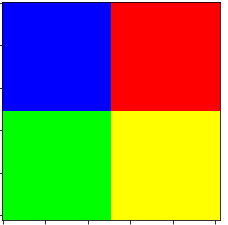
*Hint: Remember channels and color spaces*

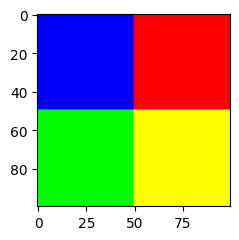

In [21]:
# solution

# Create a blank 100x100 RGB image
img_array = np.zeros((100, 100, 3), dtype=np.uint8)

# Define quadrant colors
blue   = [0, 0, 255]
red    = [255, 0, 0]
green  = [0, 255, 0]
yellow = [255, 255, 0]

# Fill each quadrant
img_array[0:50, 0:50]   = blue    # Top-left
img_array[0:50, 50:100] = red     # Top-right
img_array[50:100, 0:50] = green   # Bottom-left
img_array[50:100, 50:100] = yellow # Bottom-right

# Convert to image and show
img = Image.fromarray(img_array)
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))
ax.imshow(img)

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

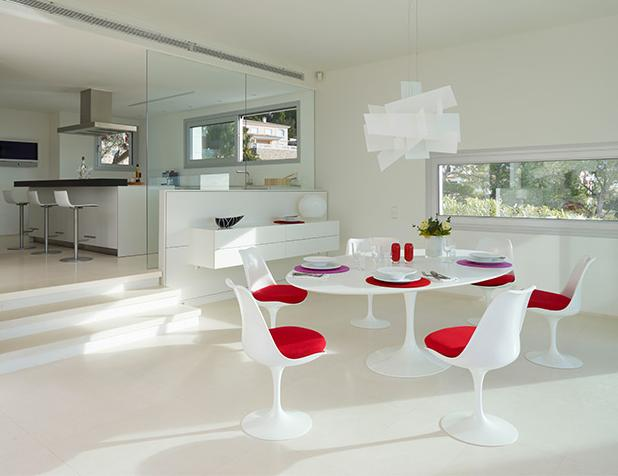

*   Extract individual channels and plot them using matplotlib subplot.



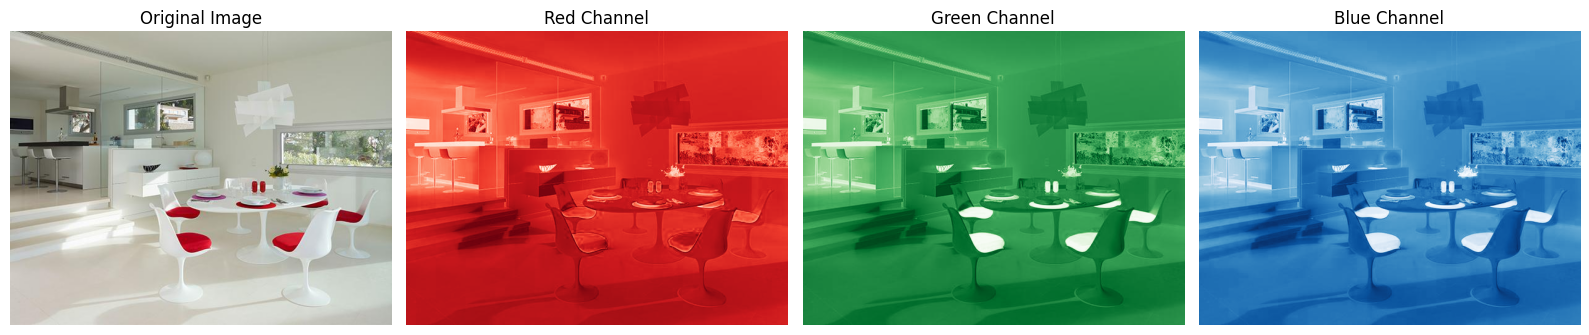

In [23]:
# solution

img = Image.open('images/sillas.jpg')

img_np = np.array(img)

# Extract RGB channels
R = img_np[:, :, 0]
G = img_np[:, :, 1]
B = img_np[:, :, 2]

# Plot original and channels
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].imshow(img_np)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(R, cmap='Reds')
axs[1].set_title('Red Channel')
axs[1].axis('off')

axs[2].imshow(G, cmap='Greens')
axs[2].set_title('Green Channel')
axs[2].axis('off')

axs[3].imshow(B, cmap='Blues')
axs[3].set_title('Blue Channel')
axs[3].axis('off')

plt.tight_layout()
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

(np.float64(-0.5), np.float64(617.5), np.float64(475.5), np.float64(-0.5))

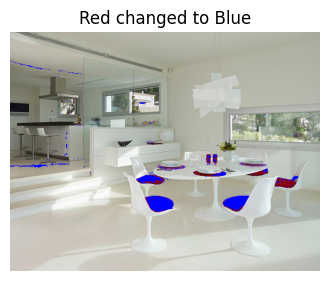

In [28]:
# solution


# Define red threshold (tolerant to slight variations)
red_mask = (img_np[:, :, 0] > 150) & (img_np[:, :, 1] < 100) & (img_np[:, :, 2] < 100)

# Replace red pixels with blue
img_np[red_mask] = [0, 0, 255]  # RGB for blue

# Convert back to image and show/save
new_img = Image.fromarray(img_np)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(new_img)
ax.set_title('Red changed to Blue')
ax.axis('off')


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

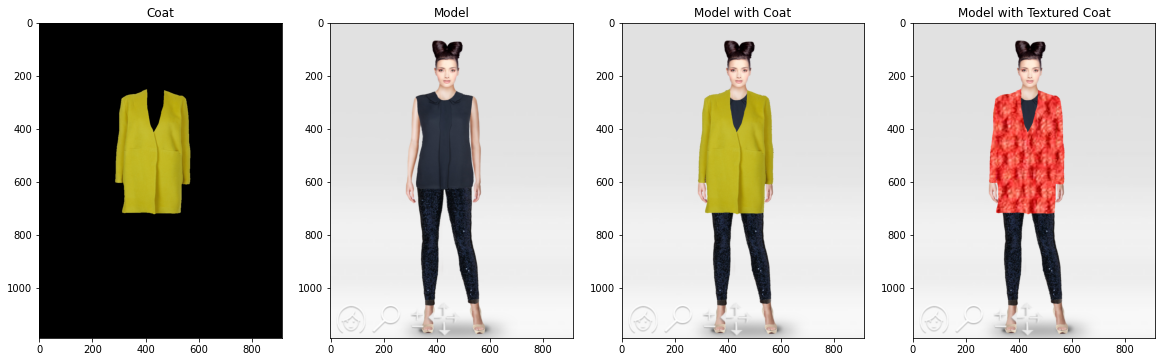

(np.float64(-0.5), np.float64(914.5), np.float64(1187.5), np.float64(-0.5))

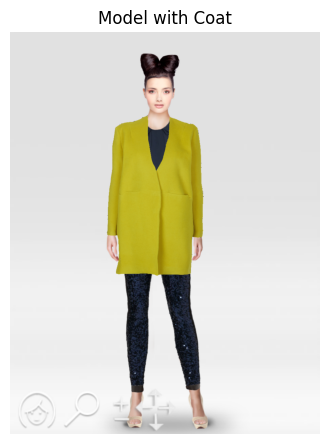

In [58]:
# solution

# Load base and overlay images (same size)
base = Image.open('images/model.png').convert('RGBA')
overlay = Image.open('images/coat.png').convert('RGBA')

# Convert to NumPy arrays
base_np = np.array(base)
overlay_np = np.array(overlay)

# Create a mask: True where overlay is not black
mask = np.any(overlay_np[:, :, :3] != [0, 0, 0], axis=-1)

# Apply mask: copy overlay pixels onto base
result_np = base_np.copy()
result_np[mask] = overlay_np[mask]

# Convert back to image and show/save
result_img = Image.fromarray(result_np)

fig, ax = plt.subplots(1, 1, figsize=(4, 6))
ax.imshow(result_img)
ax.set_title('Model with Coat')
ax.axis('off')

/var/folders/l2/6cr5h54j1vn7qvhn6w775pmw0000gn/T/ipykernel_3411/3193410122.py:11: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_txt = Image.fromarray(result_np_new, mode='RGBA')


(np.float64(-0.5), np.float64(914.5), np.float64(1187.5), np.float64(-0.5))

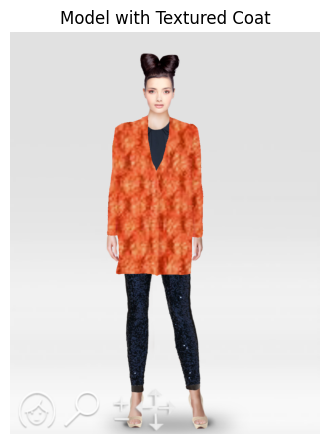

In [63]:
texture = Image.open('images/texture2.png').convert('RGBA')
texture_np = np.array(texture).astype(np.float32)

alpha = 0.25
blended_np = (alpha * overlay_np + (1 - alpha) * texture_np).astype(np.uint8)

result_np_new = result_np.copy()
result_np_new[mask] = blended_np[mask]
result_img_new = Image.fromarray(result_np_new)

img_txt = Image.fromarray(result_np_new, mode='RGBA')
fig, ax = plt.subplots(1, 1, figsize=(4, 6))
ax.imshow(img_txt)
ax.set_title('Model with Textured Coat')
ax.axis('off')

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [65]:
from skimage import data, color, exposure

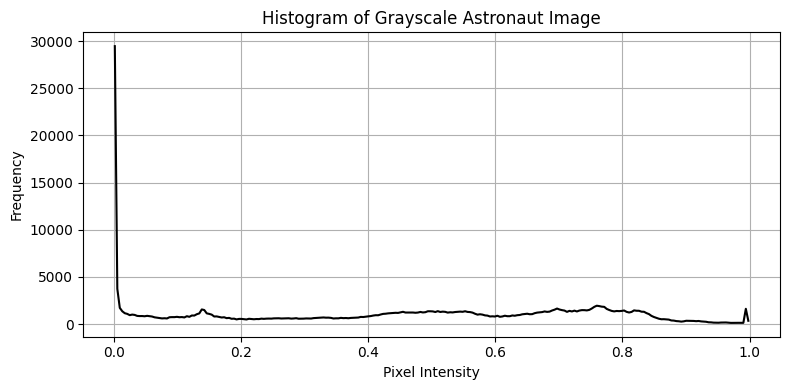

In [66]:
# solution

# Step 1: Load the astronaut image
image = data.astronaut()

# Step 2: Convert to grayscale
gray_image = color.rgb2gray(image)

# Step 3: Compute histogram
hist, bin_edges = exposure.histogram(gray_image)

# Step 4: Plot histogram
plt.figure(figsize=(8, 4))
plt.plot(bin_edges, hist, color='black')
plt.title('Histogram of Grayscale Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

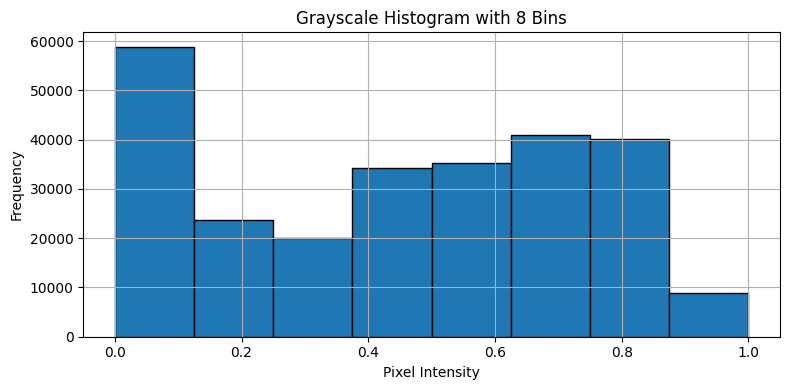

In [67]:
# solution

# Compute histogram with 8 bins
hist, bin_edges = np.histogram(gray_image, bins=8, range=(0, 1))

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')
plt.title('Grayscale Histogram with 8 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

* Yes, inference can change depending on the bin count.
* With a low bin count, the historgram becomes coarse. Subtle variations in intensity are merged, making it hard to detect fine contrast or texture.
* With a high bin count, the histogram becomes detailed. You can see fine-grained ariations, peaks, and valleys in pixel intensity.
...

In [70]:
image.shape

(512, 512, 3)


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


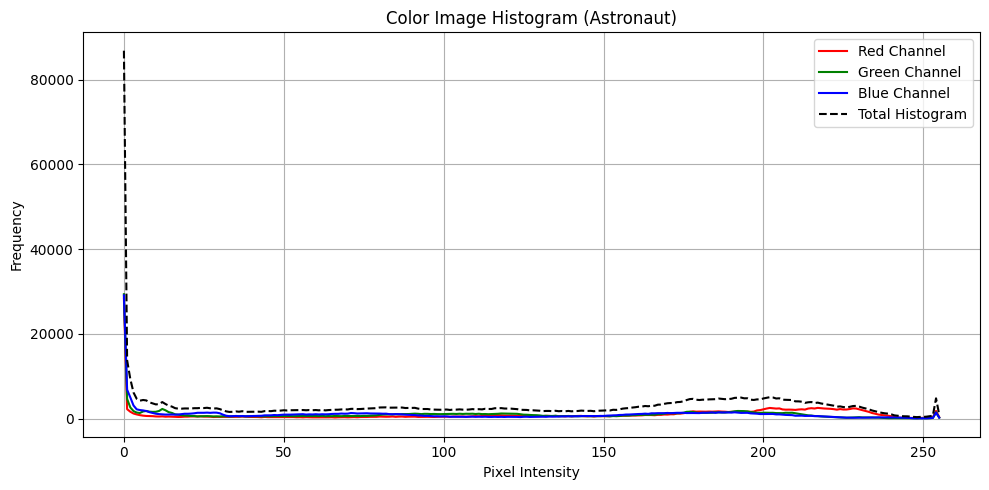

In [103]:
#solution

# Compute histograms for each channel
r_hist, _ = np.histogram(image[:, :, 0], bins=256, range=(0, 255))
g_hist, _ = np.histogram(image[:, :, 1], bins=256, range=(0, 255))
b_hist, _ = np.histogram(image[:, :, 2], bins=256, range=(0, 255))

# Compute total histogram (flatten all channels)
total_hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 255))

# Plot all histograms
plt.figure(figsize=(10, 5))
plt.plot(r_hist, color='red', label='Red Channel')
plt.plot(g_hist, color='green', label='Green Channel')
plt.plot(b_hist, color='blue', label='Blue Channel')
plt.plot(total_hist, color='black', linestyle='--', label='Total Histogram')

plt.title('Color Image Histogram (Astronaut)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



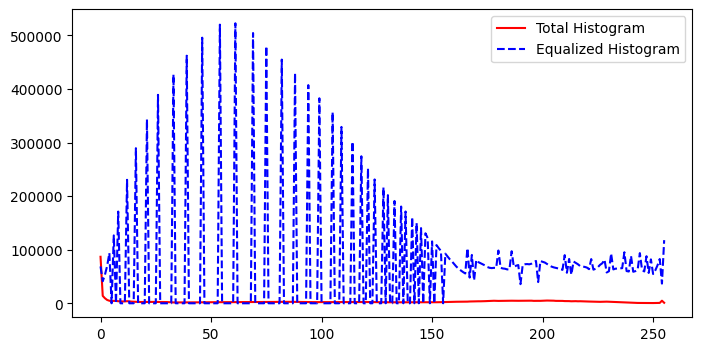

In [92]:
# solution

img = Image.open('images/aquatermi_lowcontrast.jpg')
img_np = np.array(img)
equalized = exposure.equalize_hist(img_np) * 255
eq_hist, _ = np.histogram(equalized.flatten(), bins=256, range=(0, 255))

plt.figure(figsize=(8, 4))
plt.plot(total_hist, color='red', linestyle='-', label='Total Histogram')
plt.plot(eq_hist, color='blue', linestyle='--', label='Equalized Histogram')
plt.legend()


(np.float64(-0.5), np.float64(2815.5), np.float64(2111.5), np.float64(-0.5))

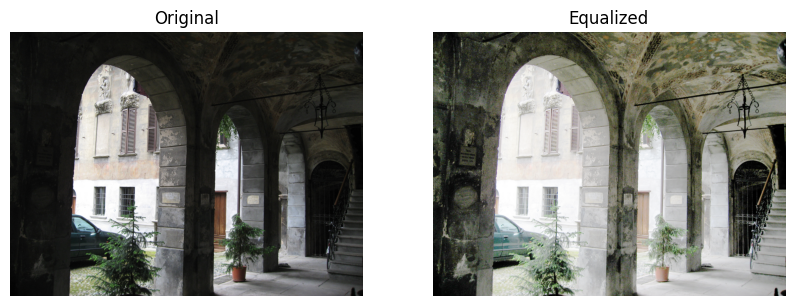

In [95]:
equalized_uint8 = equalized.astype(np.uint8)
eq_img = Image.fromarray(equalized_uint8)

# Convert back to image and show/save
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(eq_img)
ax[1].set_title('Equalized')
ax[1].axis('off')


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

* Historgram equalizeation boosts contrast especially in low-contrast regions; can introduce nonlinear changes, sometimes exaggerating noise or artifacts; may cause loss of detail in very bright or dark areas if the original histogram is skewed.

* Linear contrast stretching preserves the relative relationships between pixel intensities; enhances contrast uniformly across the image; no distortion of histogram shape-just a rescaling.

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



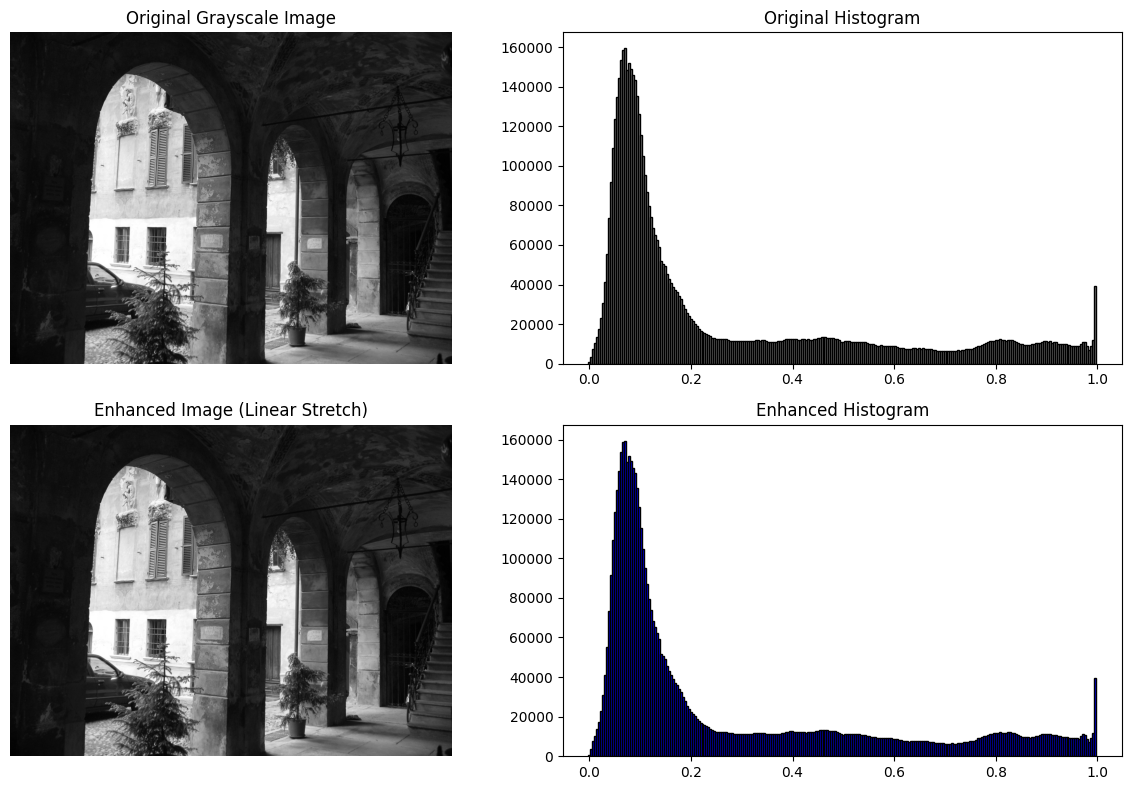

In [100]:
# solution

def linear_contrast_stretch(image, bins=256):
    # Ensure image is float in [0, 1]
    image = image.astype(np.float32)
    
    # Compute min and max intensity
    I_min = np.min(image)
    I_max = np.max(image)
    
    # Apply linear stretch
    stretched = (image - I_min) / (I_max - I_min)
    stretched = np.clip(stretched, 0, 1)  # Ensure values stay in [0, 1]
    
    return stretched

gray_image = color.rgb2gray(img_np)
enhanced_image = linear_contrast_stretch(gray_image, bins=256)

# 📊 Compute histograms
orig_hist, orig_bins = np.histogram(gray_image, bins=256, range=(0, 1))
enh_hist, enh_bins = np.histogram(enhanced_image, bins=256, range=(0, 1))

# 🎨 Plot 2x2 visualization
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title('Original Grayscale Image')
axs[0, 0].axis('off')

axs[0, 1].bar(orig_bins[:-1], orig_hist, width=np.diff(orig_bins), color='gray', edgecolor='black')
axs[0, 1].set_title('Original Histogram')

axs[1, 0].imshow(enhanced_image, cmap='gray')
axs[1, 0].set_title('Enhanced Image (Linear Stretch)')
axs[1, 0].axis('off')

axs[1, 1].bar(enh_bins[:-1], enh_hist, width=np.diff(enh_bins), color='blue', edgecolor='black')
axs[1, 1].set_title('Enhanced Histogram')

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




In [105]:
from skimage import morphology, filters, util

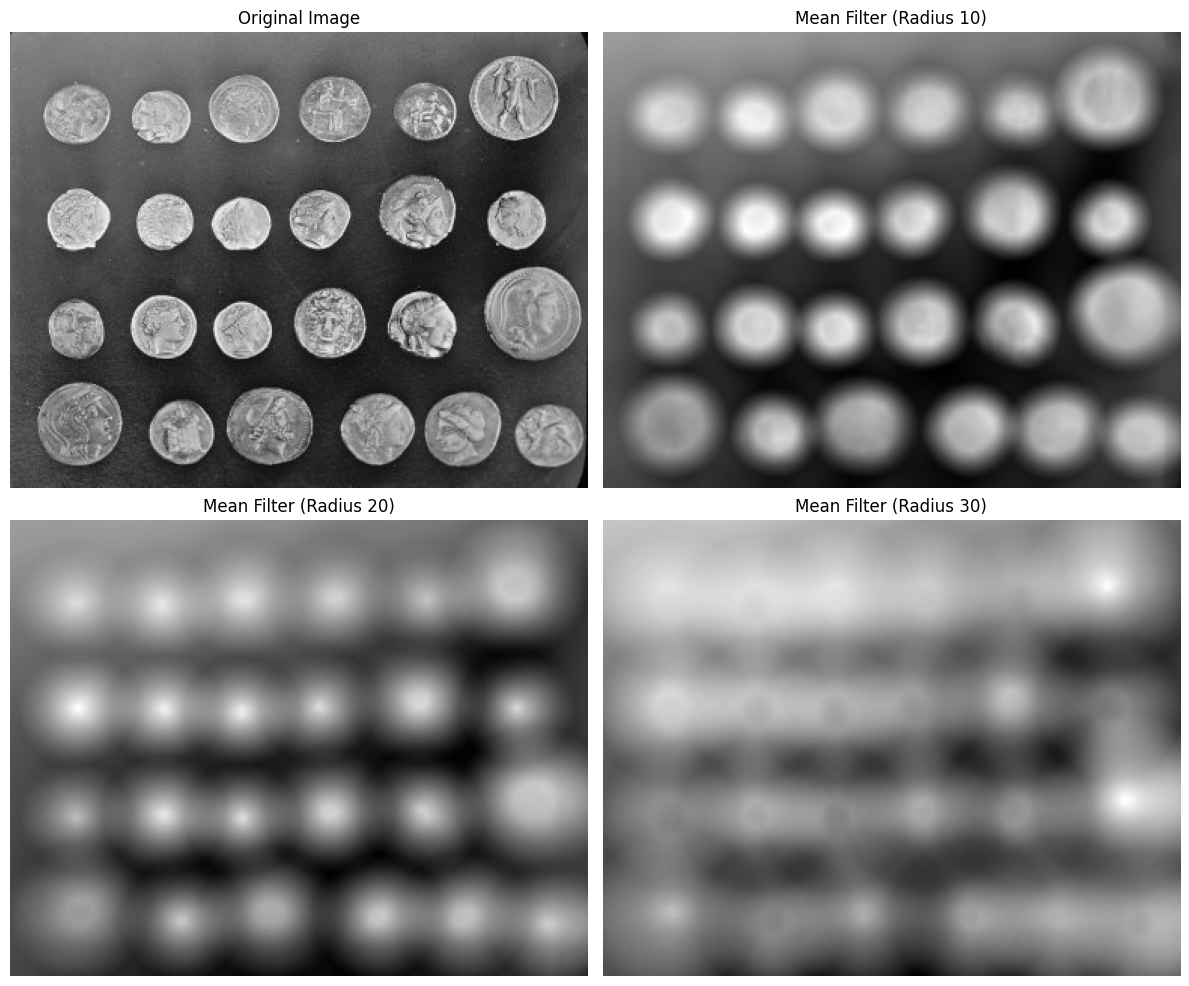

In [107]:
# solution
img = data.coins()
image = util.img_as_ubyte(img)

selem_20 = morphology.disk(20)
selem_30 = morphology.disk(30)
selem_10 = morphology.disk(10)

mean_20 = filters.rank.mean(image, footprint=selem_20)
mean_30 = filters.rank.mean(image, footprint=selem_30)
mean_10 = filters.rank.mean(image, footprint=selem_10)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(mean_10, cmap='gray')
axs[0, 1].set_title('Mean Filter (Radius 10)')
axs[0, 1].axis('off')

axs[1, 0].imshow(mean_20, cmap='gray')
axs[1, 0].set_title('Mean Filter (Radius 20)')
axs[1, 0].axis('off')

axs[1, 1].imshow(mean_30, cmap='gray')
axs[1, 1].set_title('Mean Filter (Radius 30)')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

/var/folders/l2/6cr5h54j1vn7qvhn6w775pmw0000gn/T/ipykernel_3411/504682220.py:5: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  'Square': morphology.square(21),
/var/folders/l2/6cr5h54j1vn7qvhn6w775pmw0000gn/T/ipykernel_3411/504682220.py:6: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  'Rectangle': morphology.rectangle(15, 25),


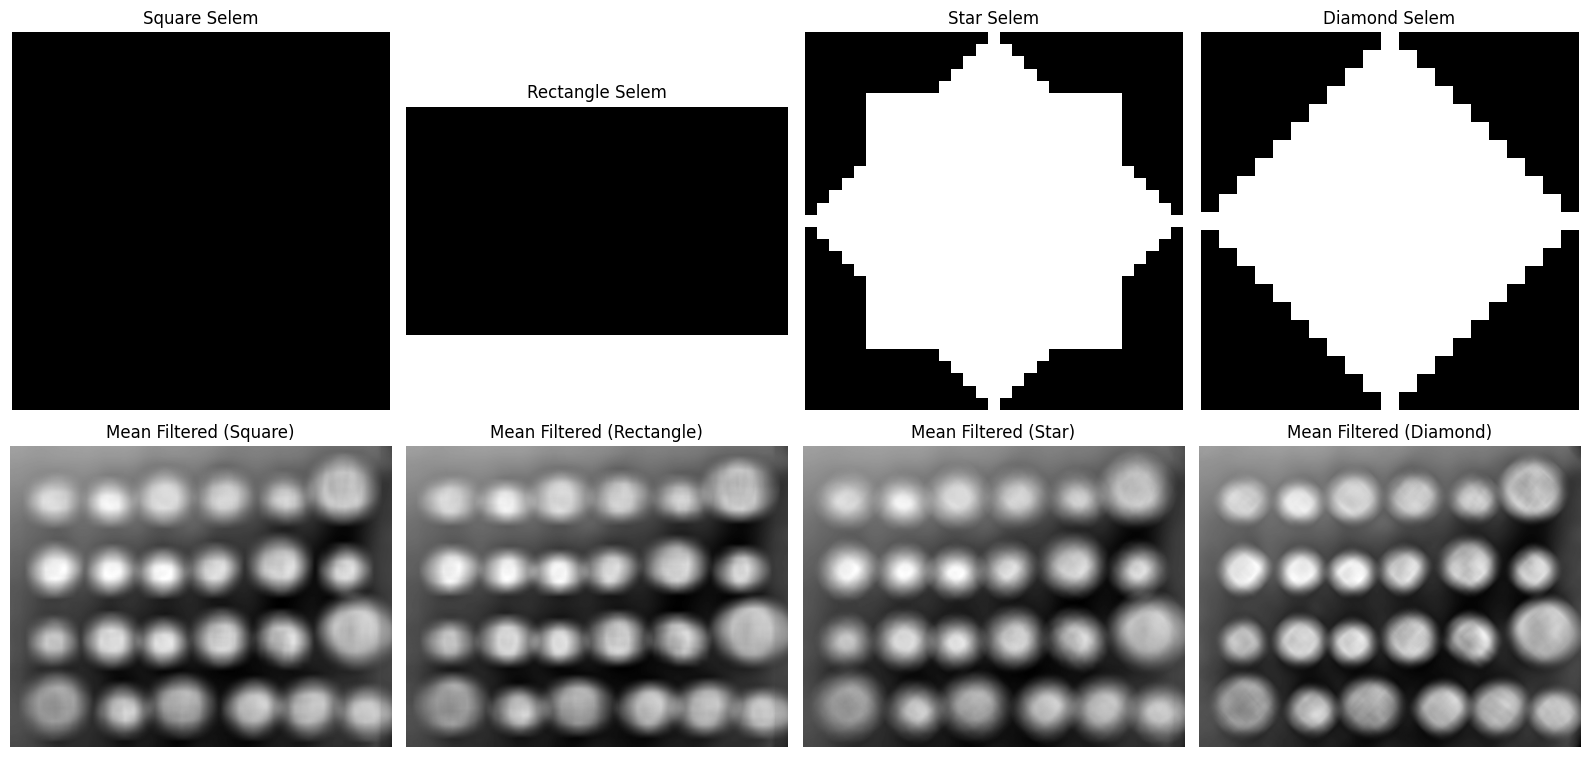

In [108]:
# solution

# Define different structuring elements
selems = {
    'Square': morphology.square(21),
    'Rectangle': morphology.rectangle(15, 25),
    'Star': morphology.star(10),
    'Diamond': morphology.diamond(10)
}

# Apply mean filter with each selem
filtered_images = {name: filters.rank.mean(image, footprint=selem) for name, selem in selems.items()}

# Create 2 x n subplot
fig, axs = plt.subplots(2, len(selems), figsize=(16, 8))

for i, (name, selem) in enumerate(selems.items()):
    # First row: show structuring element
    axs[0, i].imshow(selem, cmap='gray')
    axs[0, i].set_title(f'{name} Selem')
    axs[0, i].axis('off')
    
    # Second row: show filtered image
    axs[1, i].imshow(filtered_images[name], cmap='gray')
    axs[1, i].set_title(f'Mean Filtered ({name})')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

* Small radius: local smoothing, only nearby pixels are averaged; preserves edges and fine details.
* Medium radius: balanced smoothing, averages over a wider neighborhood; softens textures, reduces moderate noise.
* Large radius: heavy smoothing, averages over a large area; blurs edges, lattens gradients, and removes small structures.
...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

* The behavior of the mean filter changes significantly depending on the structuring element (selem) used. Each shape defines the neighborhood over which pixel values are averaged, and this influences both the directionality and extent of smoothing.
* Square: uniform smoothing in all directions, preserves symmetry and is computationally efficient. Good for general-purpose denoising.
* Rectangle: drectional smoothing, more blue along the longer axis; can elongate features or suppress noise in one direction, useful for motion blur simulation or anisotropic textures.
* Star: center-weighted smoothing with radial arms. preserves central feaures while softening edges. May retian more structure in circular or radial patterns.
* Diamond: Compact and anular smoothing, slightly sharper than disk or square, preserves corners and edges better than round shapes.

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

* Mean filter is like taking a simple average of nearby pixels. It’s blunt and effective for basic smoothing, but it doesn’t respect edges or fine structure.
* Gaussian filter is more refined—it gives more weight to the center pixel and less to the surrounding ones, which helps preserve edges while still smoothing.
* Use cases: 
✅ Mean Filter
* Quick denoising in preprocessing pipelines

* Removing salt-and-pepper noise (though median filter is often better)

* Background estimation (e.g., in coin segmentation)

* When computational simplicity is preferred

✅ Gaussian Filter
* Smoothing before edge detection (e.g., Canny)

* Reducing Gaussian noise in natural images

* Preprocessing for feature extraction in ML pipelines

* Blurring for artistic or perceptual effects

...